# Terrain Tiles

A global dataset providing bare-earth terrain heights, tiled for easy usage and provided on S3.

Source: https://registry.opendata.aws/terrain-tiles/

- Description
    - Gridded elevation tiles
- Resource type
    - S3 Bucket
- Amazon Resource Name (ARN)
    - `arn:aws:s3:::elevation-tiles-prod`
- AWS Region
    - `us-east-1`

## TerrainTiles Compositor

Select multiple terrain tiles based on arbitrary podpac Coordinates

In [1]:
from podpac.datalib.terraintiles import TerrainTiles
from podpac import Coordinates, clinspace
import numpy as np
%matplotlib inline

/Users/marcus/computing/python/anaconda3/envs/podpac2/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [7]:
# create terrain tiles node
node = TerrainTiles(zoom=6)

# select coordinates to evaluate at
c = Coordinates([clinspace(43, 42, 1000), clinspace(-73, -72, 1000)], dims=['lat', 'lon'])

# evaluate node
output = node.eval(c)

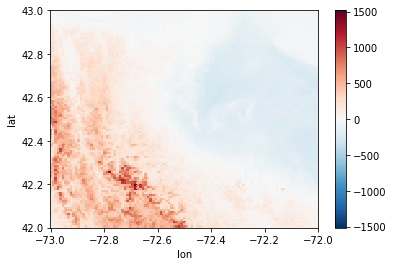

In [8]:
# plot the elevation
output.plot()

## TerrainTilesSource

In [1]:
from podpac.datalib.terraintiles import TerrainTilesSource
%matplotlib inline

/Users/marcus/computing/python/anaconda3/envs/podpac2/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# select a single source from S3 bucket url
# url is composed: {tile_format}/{zoom}/{x}/{y}.{ext}
node = TerrainTilesSource(source='geotiff/10/10/0.tif')

# evaluate node at its native coordinates
output = node.eval(node.native_coordinates)

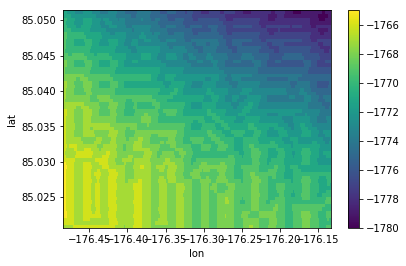

In [3]:
# plot tile
output.plot()